# Linear Regression Assignment - Boom Bike Sharing

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-contryolled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

### Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expemctations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd

'C:\\Users\\LAXMI\\Downloads\\bike_ass'

In [3]:
boombike_df = pd.read_csv("day.csv")
boombike_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
boombike_df.shape

(730, 16)

In [5]:
boombike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
boombike_df.isnull().value_counts(normalize=True)

instant  dteday  season  yr     mnth   holiday  weekday  workingday  weathersit  temp   atemp  hum    windspeed  casual  registered  cnt  
False    False   False   False  False  False    False    False       False       False  False  False  False      False   False       False    1.0
dtype: float64

In [7]:
boombike_df.isnull().sum()

#There are no null value in the dataset.

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
boombike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# Drop column which are of NO use.
#Drop "instant" Column

boombike_df.drop(["instant"],axis=1,inplace=True)

In [10]:
boombike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
boombike_df.shape

(730, 15)

In [12]:
#We will also drop "dteday" Column as "dteday" is already split as yr, mnth and day

boombike_df.drop(["dteday"],axis=1,inplace=True)

In [13]:
boombike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
boombike_df.shape

(730, 14)

In [15]:
boombike_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [16]:
boombike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


### Convert the Season, Month, Weekdays, Holiday, Working day and Weather into Categorical Column.

In [17]:
#Convert Season

boombike_df.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [18]:
boombike_df.season.replace(to_replace=(1,2,3,4),value=("Spring","Summer","Fall","Winter"),inplace=True)

In [19]:
(boombike_df.season.value_counts(normalize=True)*100)

Fall      25.753425
Summer    25.205479
Spring    24.657534
Winter    24.383562
Name: season, dtype: float64

In [20]:
#Convert Month

boombike_df.mnth.value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       1
4       1
       ..
725    12
726    12
727    12
728    12
729    12
Name: mnth, Length: 730, dtype: int64>

In [21]:
def object_month(x):
    return x.map({
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec'
    })

boombike_df[['mnth']] = boombike_df[['mnth']].apply(object_month)

In [22]:
(boombike_df.mnth.value_counts(normalize=True)*100)

Oct    8.493151
Mar    8.493151
Jul    8.493151
Dec    8.493151
Jan    8.493151
May    8.493151
Aug    8.493151
Apr    8.219178
Jun    8.219178
Sep    8.219178
Nov    8.219178
Feb    7.671233
Name: mnth, dtype: float64

In [23]:
boombike_df.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [24]:
boombike_df.yr.replace(to_replace=(0,1),value=("2018","2019"),inplace=True)

In [25]:
(boombike_df.yr.value_counts(normalize=True)*100)

2018    50.0
2019    50.0
Name: yr, dtype: float64

In [26]:
boombike_df.weekday.value_counts()

1    105
2    105
0    104
3    104
4    104
5    104
6    104
Name: weekday, dtype: int64

In [27]:
#let Weekday start from 0 : Sunday, 1: Monday, 2: Tuesday, 3: Wednesday, 4: Thursday, 5: Friday, 6: Saturday

In [28]:
def object_days(x):
    return x.map({
        0:'Sunday',
        1:'Monday',
        2:'Tuesday',
        3:'Wednesday',
        4:'Thursday',
        5:'Friday',
        6:'Saturday'
    })

boombike_df[['weekday']] = boombike_df[['weekday']].apply(object_days)

In [29]:
(boombike_df.weekday.value_counts(normalize=True)*100)

Monday       14.383562
Tuesday      14.383562
Thursday     14.246575
Friday       14.246575
Sunday       14.246575
Saturday     14.246575
Wednesday    14.246575
Name: weekday, dtype: float64

In [30]:
boombike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [31]:
#Change Holiday

boombike_df.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [32]:
#let 1 : Is_Holiday and 0 : No Holiday

In [33]:
boombike_df.holiday.replace(to_replace=(0,1),value=("No Holiday","Is_Holiday"),inplace=True)

In [34]:
(boombike_df.holiday.value_counts(normalize=True)*100)

No Holiday    97.123288
Is_Holiday     2.876712
Name: holiday, dtype: float64

In [35]:
#Change working day

boombike_df.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [36]:
#let 1 : Workining day and 0 : No Workining day

In [37]:
boombike_df.workingday.replace(to_replace=(0,1),value=("No Workining day","Workining day"),inplace=True)

In [38]:
(boombike_df.workingday.value_counts(normalize=True)*100)

Workining day       69.041096
No Workining day    30.958904
Name: workingday, dtype: float64

In [39]:
#Change weather column 1 : clear , 2: mist+cloudy 3: Light Rain

boombike_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [40]:
boombike_df.weathersit.replace(to_replace=(1,2,3),value=("Clear","Mist + Cloudy","Light Rain"),inplace=True)

In [41]:
(boombike_df.weathersit.value_counts(normalize=True)*100)

Clear            63.424658
Mist + Cloudy    33.698630
Light Rain        2.876712
Name: weathersit, dtype: float64

In [42]:
boombike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 80.0+ KB


In [43]:
# Find all the categorical variables in the dataset

boomike_df_categorical = boombike_df.select_dtypes(exclude=['float64','datetime64','int64'])
boomike_df_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [44]:
len(boomike_df_categorical.columns)

7

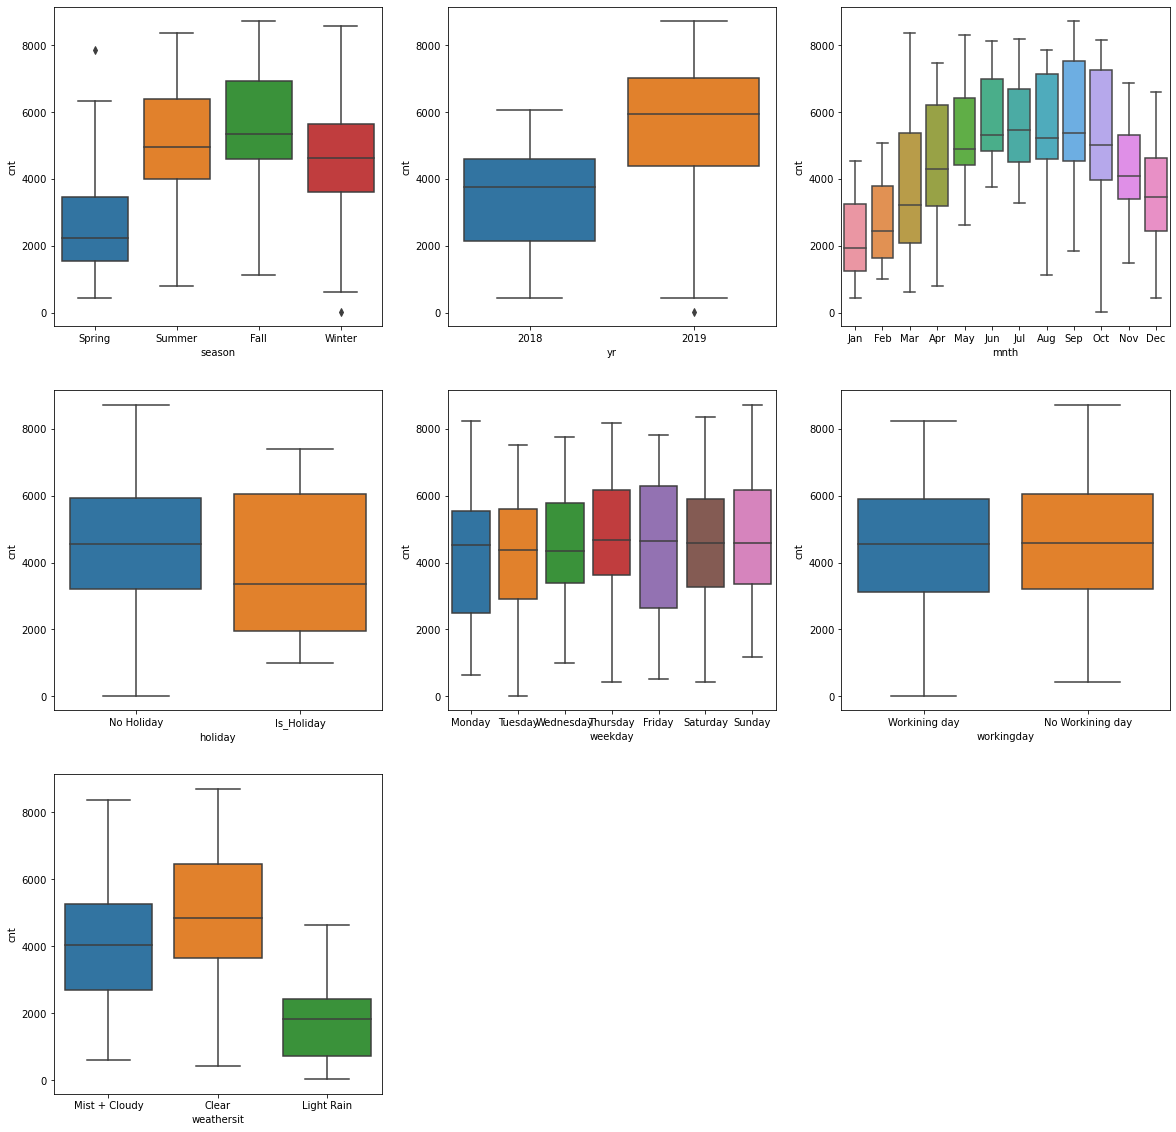

In [45]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=boombike_df)

plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=boombike_df)

plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=boombike_df)

plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=boombike_df)

plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data=boombike_df)

plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=boombike_df)

plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data=boombike_df)

plt.show();

In [46]:
boombike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 80.0+ KB


In [47]:
boombike_df.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [48]:
#It will give numerical data and desribe them .

boombike_df.describe().columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [49]:
IntVariableList=['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

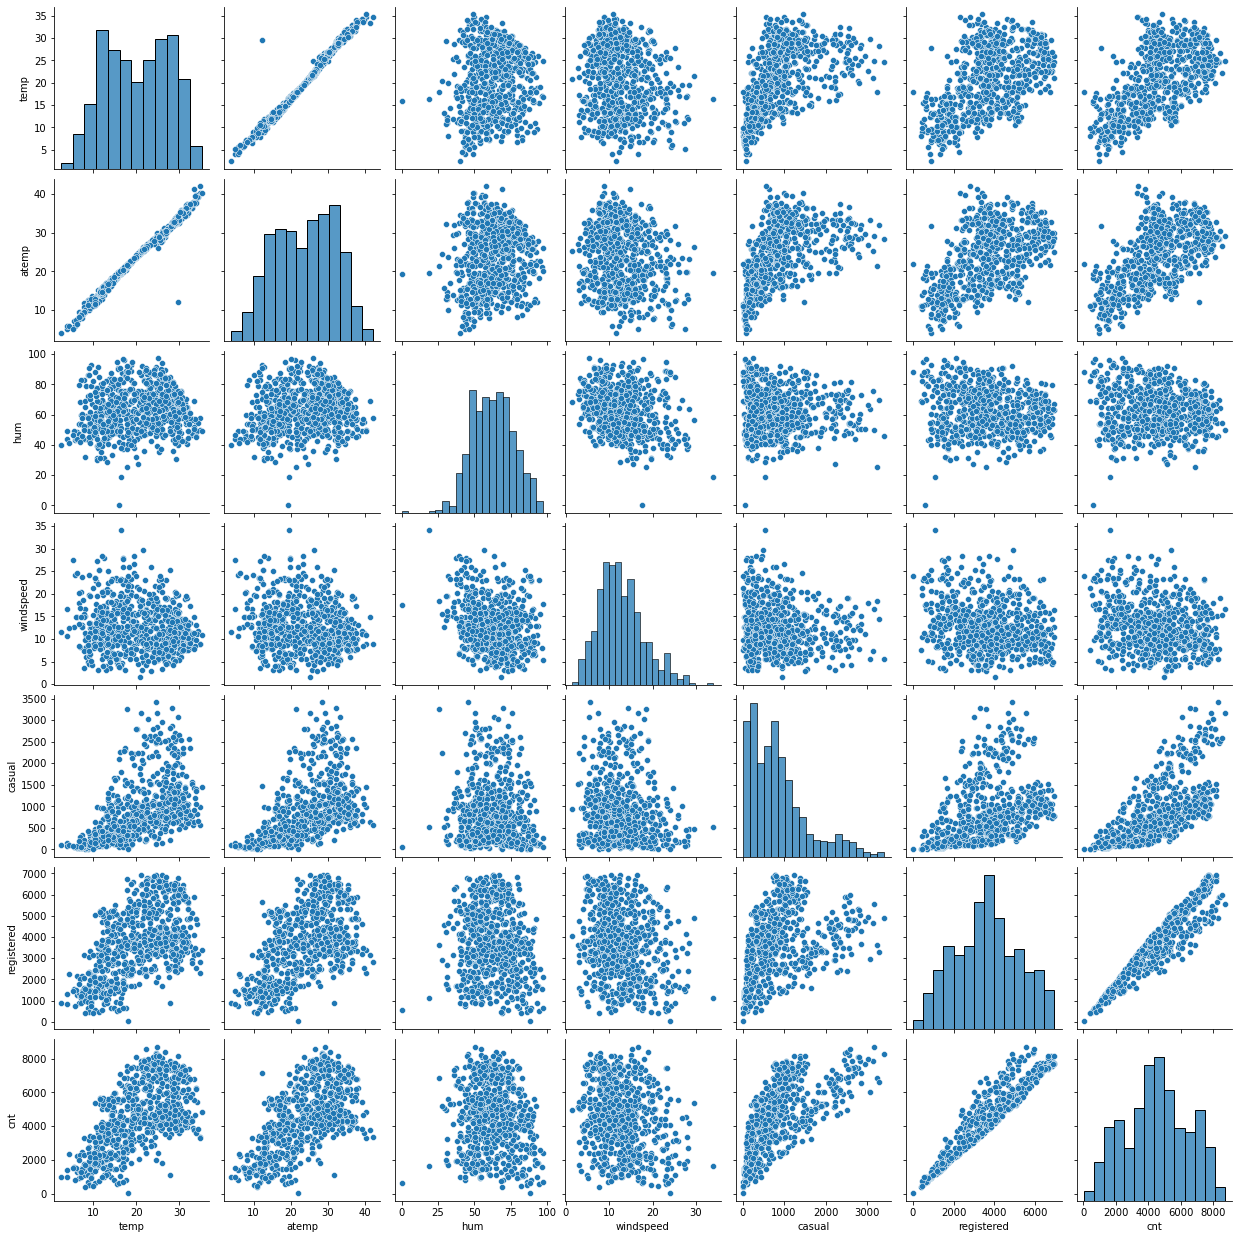

In [50]:
sns.pairplot(boombike_df[IntVariableList])
plt.show();

In [51]:
#show correlation between numerical data.

corr = boombike_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()
corr

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


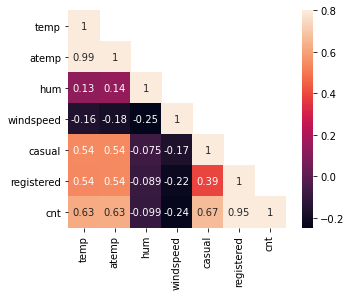

In [52]:
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr, mask=mask, vmax=.8, square=True, annot=True);

In [53]:
# from above graph we found out that temp and atemp will follow multicolinarity so we drop one of them i.e atemp

boombike_df=boombike_df.drop(columns = ['atemp'])

In [54]:
boombike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,Spring,2018,Jan,No Holiday,Monday,Workining day,Mist + Cloudy,14.110847,80.5833,10.749882,331,654,985
1,Spring,2018,Jan,No Holiday,Tuesday,Workining day,Mist + Cloudy,14.902598,69.6087,16.652113,131,670,801
2,Spring,2018,Jan,No Holiday,Wednesday,Workining day,Clear,8.050924,43.7273,16.636703,120,1229,1349
3,Spring,2018,Jan,No Holiday,Thursday,Workining day,Clear,8.200000,59.0435,10.739832,108,1454,1562
4,Spring,2018,Jan,No Holiday,Friday,Workining day,Clear,9.305237,43.6957,12.522300,82,1518,1600


In [55]:
### Prepare Dummies Data to form dataframe for Linear Regression Modelling

boomike_df_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [56]:
boombike_df_dummies = pd.get_dummies(boomike_df_categorical, drop_first=True)
boombike_df_dummies.head()

,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,holiday_No Holiday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Workining day,weathersit_Light Rain,weathersit_Mist + Cloudy
0,1,0,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [57]:
boombike_new = pd.concat([boombike_df, boombike_df_dummies], axis=1)

In [58]:
boombike_new.shape

(730, 38)

In [59]:
boombike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   season                    730 non-null    object 
 1   yr                        730 non-null    object 
 2   mnth                      730 non-null    object 
 3   holiday                   730 non-null    object 
 4   weekday                   730 non-null    object 
 5   workingday                730 non-null    object 
 6   weathersit                730 non-null    object 
 7   temp                      730 non-null    float64
 8   hum                       730 non-null    float64
 9   windspeed                 730 non-null    float64
 10  casual                    730 non-null    int64  
 11  registered                730 non-null    int64  
 12  cnt                       730 non-null    int64  
 13  season_Spring             730 non-null    uint8  
 14  season_Sum

In [60]:
boombike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,holiday_No Holiday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Workining day,weathersit_Light Rain,weathersit_Mist + Cloudy
0,Spring,2018,Jan,No Holiday,Monday,Workining day,Mist + Cloudy,14.110847,80.5833,10.749882,...,1,1,0,0,0,0,0,1,0,1
1,Spring,2018,Jan,No Holiday,Tuesday,Workining day,Mist + Cloudy,14.902598,69.6087,16.652113,...,1,0,0,0,0,1,0,1,0,1
2,Spring,2018,Jan,No Holiday,Wednesday,Workining day,Clear,8.050924,43.7273,16.636703,...,1,0,0,0,0,0,1,1,0,0
3,Spring,2018,Jan,No Holiday,Thursday,Workining day,Clear,8.200000,59.0435,10.739832,...,1,0,0,0,1,0,0,1,0,0
4,Spring,2018,Jan,No Holiday,Friday,Workining day,Clear,9.305237,43.6957,12.522300,...,1,0,0,0,0,0,0,1,0,0


In [61]:
boombike_new.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter', 'yr_2019',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'holiday_No Holiday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'workingday_Workining day',
       'weathersit_Light Rain', 'weathersit_Mist + Cloudy'],
      dtype='object')

In [62]:
boombike_new.drop(['season','mnth', 'weekday','weathersit','holiday','workingday','yr'],axis=1,inplace=True)

In [63]:
boombike_new.columns

Index(['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter', 'yr_2019',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'holiday_No Holiday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'workingday_Workining day',
       'weathersit_Light Rain', 'weathersit_Mist + Cloudy'],
      dtype='object')

In [64]:
boombike_new.drop(['casual', 'registered'],axis=1,inplace=True)

In [65]:
boombike_new.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_Spring', 'season_Summer',
       'season_Winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'holiday_No Holiday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'workingday_Workining day',
       'weathersit_Light Rain', 'weathersit_Mist + Cloudy'],
      dtype='object')

In [66]:
boombike_new.shape

(730, 29)

### Split the data Into Train and Test data

In [67]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(boombike_new, train_size = 0.7, test_size = 0.3, random_state = 100)

print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


In [68]:
#Scaling

from sklearn.preprocessing import MinMaxScaler

In [69]:
scaler = MinMaxScaler()

In [70]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [71]:
df_train.head()

,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_No Holiday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Workining day,weathersit_Light Rain,weathersit_Mist + Cloudy
653,0.509887,0.575354,0.300794,0.864243,0,0,1,1,0,0,...,1,0,0,0,0,0,1,1,0,0
576,0.815169,0.725633,0.264686,0.827658,0,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
426,0.442393,0.640189,0.255342,0.465255,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
728,0.245101,0.498067,0.663106,0.204096,1,0,0,1,0,1,...,1,1,0,0,0,0,0,1,0,0
482,0.395666,0.504508,0.188475,0.482973,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1


In [72]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   temp                      510 non-null    float64
 1   hum                       510 non-null    float64
 2   windspeed                 510 non-null    float64
 3   cnt                       510 non-null    float64
 4   season_Spring             510 non-null    uint8  
 5   season_Summer             510 non-null    uint8  
 6   season_Winter             510 non-null    uint8  
 7   yr_2019                   510 non-null    uint8  
 8   mnth_Aug                  510 non-null    uint8  
 9   mnth_Dec                  510 non-null    uint8  
 10  mnth_Feb                  510 non-null    uint8  
 11  mnth_Jan                  510 non-null    uint8  
 12  mnth_Jul                  510 non-null    uint8  
 13  mnth_Jun                  510 non-null    uint8  
 14  mnth_Mar 

In [73]:
df_train.describe()

,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_No Holiday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Workining day,weathersit_Light Rain,weathersit_Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.507843,0.096078,0.084314,...,0.974510,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.711765,0.029412,0.343137
std,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.500429,0.294988,0.278131,...,0.157763,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.453386,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


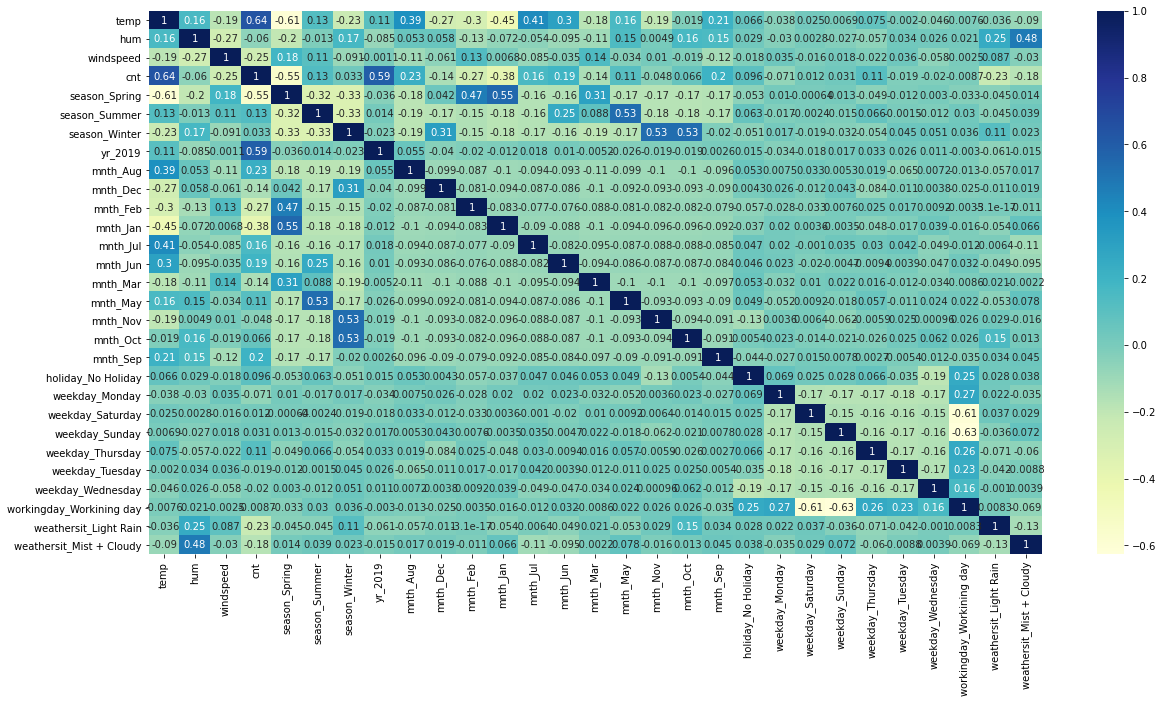

In [74]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [75]:
# Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

In [76]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [77]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,20)
rfe = rfe.fit(X_train,y_train)

In [78]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 4),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 8),
 ('mnth_Mar', False, 9),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 6),
 ('mnth_Sep', True, 1),
 ('holiday_No Holiday', True, 1),
 ('weekday_Monday', False, 3),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 7),
 ('weekday_Tuesday', False, 2),
 ('weekday_Wednesday', False, 5),
 ('workingday_Workining day', True, 1),
 ('weathersit_Light Rain', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [79]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'yr_2019', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_May', 'mnth_Nov', 'mnth_Sep', 'holiday_No Holiday',
       'weekday_Saturday', 'weekday_Sunday', 'workingday_Workining day',
       'weathersit_Light Rain', 'weathersit_Mist + Cloudy'],
      dtype='object')

In [80]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Jun', 'mnth_Mar', 'mnth_Oct', 'weekday_Monday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [81]:
X_train_rfe = X_train[col]

In [82]:
len(X_train.columns[rfe.support_])

20

## Vif varification

## Model 1

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
#check vif

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                    Features     VIF
18        holiday_No Holiday  266.67
25  workingday_Workining day  217.91
21            weekday_Sunday   41.94
20          weekday_Saturday   39.72
1                        hum   39.39
0                       temp   38.92
3              season_Spring   12.53
5              season_Winter   12.26
4              season_Summer    8.15
16                  mnth_Oct    6.55
7                   mnth_Aug    6.41
15                  mnth_Nov    6.24
11                  mnth_Jul    5.68
10                  mnth_Jan    5.50
2                  windspeed    5.31
8                   mnth_Dec    5.16
17                  mnth_Sep    4.57
9                   mnth_Feb    4.15
13                  mnth_Mar    3.53
12                  mnth_Jun    3.01
14                  mnth_May    2.43
27  weathersit_Mist + Cloudy    2.40
6                    yr_2019    2.15
19            weekday_Monday    2.06
23           weekday_Tuesday    2.06
22          weekday_Thursday    2.01
2

In [85]:
#Build Model with all the variable
X_train_sm = sm.add_constant(X_train_rfe)

#Create Model
lr = sm.OLS(y_train,X_train_sm)

#fit the model
lr_model = lr.fit()

#parameters of the model
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.9
Date:                Wed, 11 Aug 2021   Prob (F-statistic):          9.48e-186
Time:                        21:43:39   Log-Likelihood:                 519.76
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     489   BIC:                            -908.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2588      0.047      5.461      0.000       0.166       0.352
temp                         0.4517      0.039     11.671      0.000       0.376       0.528
hum                         -0.1591      0.038     -4.180      0.000      -0.234      -0.084
windspeed                   -0.1869      0.026     -7.267      0.000      -0.237      -0.136
season_Spring               -0.0568      0.022     -2.564      0.011      -0.100      -0.013
season_Summer                0.0270      0.017      1.576      0.116      -0.007       0.061
season_Winter                0.0999      0.018      5.558      0.000       0.065       0.135
yr_2019                      0.2310      0.008     28.611      0.000       0.215       0.247
mnth_Dec                    -0.0498      0.018     -2.720      0.007      -0.086      -0.014
mnth_Feb                    -0.0373      0.022     -1.723      0.085      -0.080       0.005
mnth_Jan                    -0.0649      0.021     -3.023      0.003      -0.107      -0.023
mnth_Jul                    -0.0545      0.018     -3.000      0.003      -0.090      -0.019
mnth_May                     0.0248      0.018      1.419      0.157      -0.010       0.059
mnth_Nov                    -0.0454      0.019     -2.387      0.017      -0.083      -0.008
mnth_Sep                     0.0725      0.017      4.310      0.000       0.039       0.106
holiday_No Holiday           0.1347      0.065      2.062      0.040       0.006       0.263
weekday_Saturday            -0.0407      0.070     -0.578      0.564      -0.179       0.098
weekday_Sunday              -0.0345      0.070     -0.490      0.624      -0.173       0.104
workingday_Workining day    -0.0570      0.071     -0.806      0.421      -0.196       0.082
weathersit_Light Rain       -0.2498      0.026     -9.475      0.000      -0.302      -0.198
weathersit_Mist + Cloudy    -0.0588      0.010     -5.600      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       80.595   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.883
Skew:                          -0.798   Prob(JB):                     3.24e-45
Kurtosis:                       5.663   Cond. No.                         68.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 2

In [86]:
#drop the column
X_train_sm2 = X_train_rfe.drop("weekday_Sunday",axis = 1)
#check vif
vif = pd.DataFrame()
vif['Features'] = X_train_sm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm2.values, i) for i in range(X_train_sm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                    Features    VIF
1                        hum  34.78
14        holiday_No Holiday  32.53
0                       temp  22.51
16  workingday_Workining day   6.34
3              season_Spring   6.07
2                  windspeed   5.05
5              season_Winter   4.40
4              season_Summer   3.71
9                   mnth_Jan   2.42
18  weathersit_Mist + Cloudy   2.36
6                    yr_2019   2.11
15          weekday_Saturday   1.94
8                   mnth_Feb   1.92
12                  mnth_Nov   1.84
7                   mnth_Dec   1.70
10                  mnth_Jul   1.61
11                  mnth_May   1.60
13                  mnth_Sep   1.41
17     weathersit_Light Rain   1.29


In [87]:
#Build Model with all the variable
X_train_lm2 = sm.add_constant(X_train_sm2)

#Create Model
lr2 = sm.OLS(y_train,X_train_sm2).fit()

#parameters and summary of the model
lr2.params
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              975.8
Date:                Wed, 11 Aug 2021   Prob (F-statistic):                        0.00
Time:                        21:43:39   Log-Likelihood:                          504.24
No. Observations:                 510   AIC:                                     -970.5
Df Residuals:                     491   BIC:                                     -890.0
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
temp                         0.5708      0.033     17.253      0.000       0.506       0.636
hum                         -0.0755      0.036     -2.101      0.036      -0.146      -0.005
windspeed                   -0.1436      0.025     -5.706      0.000      -0.193      -0.094
season_Spring               -0.0010      0.020     -0.048      0.962      -0.041       0.039
season_Summer                0.0693      0.016      4.385      0.000       0.038       0.100
season_Winter                0.1380      0.017      8.082      0.000       0.104       0.171
yr_2019                      0.2334      0.008     28.185      0.000       0.217       0.250
mnth_Dec                    -0.0252      0.018     -1.380      0.168      -0.061       0.011
mnth_Feb                    -0.0137      0.022     -0.627      0.531      -0.057       0.029
mnth_Jan                    -0.0328      0.021     -1.545      0.123      -0.075       0.009
mnth_Jul                    -0.0481      0.019     -2.583      0.010      -0.085      -0.012
mnth_May                     0.0069      0.018      0.388      0.698      -0.028       0.042
mnth_Nov                    -0.0180      0.019     -0.958      0.339      -0.055       0.019
mnth_Sep                     0.0896      0.017      5.268      0.000       0.056       0.123
holiday_No Holiday           0.1875      0.023      7.987      0.000       0.141       0.234
weekday_Saturday            -0.0057      0.016     -0.365      0.715      -0.037       0.025
workingday_Workining day    -0.0235      0.012     -1.940      0.053      -0.047       0.000
weathersit_Light Rain       -0.2689      0.027    -10.001      0.000      -0.322      -0.216
weathersit_Mist + Cloudy    -0.0678      0.011     -6.362      0.000      -0.089      -0.047
==============================================================================
Omnibus:                       66.438   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.300
Skew:                          -0.718   Prob(JB):                     7.64e-32
Kurtosis:                       5.164   Cond. No.                         21.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 3

In [88]:
#drop the column
X_train_sm3 = X_train_sm2.drop("weekday_Saturday",axis = 1)
#check vif
vif = pd.DataFrame()
vif['Features'] = X_train_sm3.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm3.values, i) for i in range(X_train_sm3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                    Features    VIF
1                        hum  34.78
14        holiday_No Holiday  29.73
0                       temp  22.49
3              season_Spring   6.07
2                  windspeed   5.05
5              season_Winter   4.40
15  workingday_Workining day   3.79
4              season_Summer   3.70
9                   mnth_Jan   2.42
17  weathersit_Mist + Cloudy   2.36
6                    yr_2019   2.11
8                   mnth_Feb   1.92
12                  mnth_Nov   1.83
7                   mnth_Dec   1.70
10                  mnth_Jul   1.61
11                  mnth_May   1.60
13                  mnth_Sep   1.41
16     weathersit_Light Rain   1.29


In [89]:
#Build Model with all the variable
X_train_lm3 = sm.add_constant(X_train_sm3)

#Create Model
lr3 = sm.OLS(y_train,X_train_sm3).fit()

#parameters and summary of the model
lr3.params
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              1032.
Date:                Wed, 11 Aug 2021   Prob (F-statistic):                        0.00
Time:                        21:43:40   Log-Likelihood:                          504.17
No. Observations:                 510   AIC:                                     -972.3
Df Residuals:                     492   BIC:                                     -896.1
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
temp                         0.5704      0.033     17.266      0.000       0.505       0.635
hum                         -0.0756      0.036     -2.106      0.036      -0.146      -0.005
windspeed                   -0.1434      0.025     -5.705      0.000      -0.193      -0.094
season_Spring               -0.0012      0.020     -0.059      0.953      -0.041       0.039
season_Summer                0.0692      0.016      4.383      0.000       0.038       0.100
season_Winter                0.1379      0.017      8.086      0.000       0.104       0.171
yr_2019                      0.2334      0.008     28.232      0.000       0.217       0.250
mnth_Dec                    -0.0251      0.018     -1.376      0.170      -0.061       0.011
mnth_Feb                    -0.0135      0.022     -0.620      0.536      -0.056       0.029
mnth_Jan                    -0.0329      0.021     -1.548      0.122      -0.075       0.009
mnth_Jul                    -0.0480      0.019     -2.577      0.010      -0.085      -0.011
mnth_May                     0.0068      0.018      0.385      0.700      -0.028       0.042
mnth_Nov                    -0.0184      0.019     -0.983      0.326      -0.055       0.018
mnth_Sep                     0.0896      0.017      5.272      0.000       0.056       0.123
holiday_No Holiday           0.1850      0.022      8.250      0.000       0.141       0.229
workingday_Workining day    -0.0207      0.009     -2.213      0.027      -0.039      -0.002
weathersit_Light Rain       -0.2693      0.027    -10.031      0.000      -0.322      -0.217
weathersit_Mist + Cloudy    -0.0677      0.011     -6.361      0.000      -0.089      -0.047
==============================================================================
Omnibus:                       65.629   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.297
Skew:                          -0.710   Prob(JB):                     2.08e-31
Kurtosis:                       5.152   Cond. No.                         21.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 4

In [90]:
#drop the column
X_train_sm4 = X_train_sm3.drop("season_Spring",axis = 1)
#check vif
vif = pd.DataFrame()
vif['Features'] = X_train_sm4.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm4.values, i) for i in range(X_train_sm4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                    Features    VIF
1                        hum  31.28
13        holiday_No Holiday  26.82
0                       temp  18.03
2                  windspeed   4.56
14  workingday_Workining day   3.78
4              season_Winter   3.01
3              season_Summer   2.72
16  weathersit_Mist + Cloudy   2.28
5                    yr_2019   2.09
8                   mnth_Jan   2.09
11                  mnth_Nov   1.83
6                   mnth_Dec   1.69
7                   mnth_Feb   1.61
10                  mnth_May   1.59
9                   mnth_Jul   1.56
12                  mnth_Sep   1.34
15     weathersit_Light Rain   1.26


In [91]:
#Build Model with all the variable
X_train_lm4 = sm.add_constant(X_train_sm4)

#Create Model
lr4 = sm.OLS(y_train,X_train_sm4).fit()

#parameters and summary of the model
lr4.params
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              1095.
Date:                Wed, 11 Aug 2021   Prob (F-statistic):                        0.00
Time:                        21:43:40   Log-Likelihood:                          504.17
No. Observations:                 510   AIC:                                     -974.3
Df Residuals:                     493   BIC:                                     -902.4
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
temp                         0.5712      0.030     19.334      0.000       0.513       0.629
hum                         -0.0763      0.034     -2.243      0.025      -0.143      -0.009
windspeed                   -0.1439      0.024     -6.026      0.000      -0.191      -0.097
season_Summer                0.0697      0.013      5.161      0.000       0.043       0.096
season_Winter                0.1385      0.014      9.827      0.000       0.111       0.166
yr_2019                      0.2334      0.008     28.363      0.000       0.217       0.250
mnth_Dec                    -0.0252      0.018     -1.388      0.166      -0.061       0.010
mnth_Feb                    -0.0140      0.020     -0.703      0.482      -0.053       0.025
mnth_Jan                    -0.0334      0.020     -1.692      0.091      -0.072       0.005
mnth_Jul                    -0.0478      0.018     -2.611      0.009      -0.084      -0.012
mnth_May                     0.0067      0.018      0.383      0.702      -0.028       0.041
mnth_Nov                    -0.0184      0.019     -0.983      0.326      -0.055       0.018
mnth_Sep                     0.0898      0.017      5.424      0.000       0.057       0.122
holiday_No Holiday           0.1846      0.021      8.676      0.000       0.143       0.226
workingday_Workining day    -0.0207      0.009     -2.214      0.027      -0.039      -0.002
weathersit_Light Rain       -0.2690      0.027    -10.133      0.000      -0.321      -0.217
weathersit_Mist + Cloudy    -0.0676      0.010     -6.462      0.000      -0.088      -0.047
==============================================================================
Omnibus:                       65.540   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.750
Skew:                          -0.710   Prob(JB):                     2.73e-31
Kurtosis:                       5.146   Cond. No.                         19.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 5

In [92]:
#drop the column
X_train_sm5 = X_train_sm4.drop("mnth_May",axis = 1)
#check vif
vif = pd.DataFrame()
vif['Features'] = X_train_sm4.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm4.values, i) for i in range(X_train_sm4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                    Features    VIF
1                        hum  31.28
13        holiday_No Holiday  26.82
0                       temp  18.03
2                  windspeed   4.56
14  workingday_Workining day   3.78
4              season_Winter   3.01
3              season_Summer   2.72
16  weathersit_Mist + Cloudy   2.28
5                    yr_2019   2.09
8                   mnth_Jan   2.09
11                  mnth_Nov   1.83
6                   mnth_Dec   1.69
7                   mnth_Feb   1.61
10                  mnth_May   1.59
9                   mnth_Jul   1.56
12                  mnth_Sep   1.34
15     weathersit_Light Rain   1.26


In [93]:
#Build Model with all the variable
X_train_lm5 = sm.add_constant(X_train_sm5)

#Create Model
lr5 = sm.OLS(y_train,X_train_sm5).fit()

#parameters and summary of the model
lr5.params
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              1165.
Date:                Wed, 11 Aug 2021   Prob (F-statistic):                        0.00
Time:                        21:43:40   Log-Likelihood:                          504.09
No. Observations:                 510   AIC:                                     -976.2
Df Residuals:                     494   BIC:                                     -908.4
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
temp                         0.5721      0.029     19.435      0.000       0.514       0.630
hum                         -0.0753      0.034     -2.222      0.027      -0.142      -0.009
windspeed                   -0.1448      0.024     -6.105      0.000      -0.191      -0.098
season_Summer                0.0719      0.012      5.952      0.000       0.048       0.096
season_Winter                0.1384      0.014      9.831      0.000       0.111       0.166
yr_2019                      0.2332      0.008     28.412      0.000       0.217       0.249
mnth_Dec                    -0.0251      0.018     -1.383      0.167      -0.061       0.011
mnth_Feb                    -0.0137      0.020     -0.689      0.491      -0.053       0.025
mnth_Jan                    -0.0331      0.020     -1.681      0.093      -0.072       0.006
mnth_Jul                    -0.0481      0.018     -2.632      0.009      -0.084      -0.012
mnth_Nov                    -0.0182      0.019     -0.977      0.329      -0.055       0.018
mnth_Sep                     0.0895      0.017      5.416      0.000       0.057       0.122
holiday_No Holiday           0.1839      0.021      8.683      0.000       0.142       0.225
workingday_Workining day    -0.0207      0.009     -2.216      0.027      -0.039      -0.002
weathersit_Light Rain       -0.2694      0.027    -10.162      0.000      -0.322      -0.217
weathersit_Mist + Cloudy    -0.0676      0.010     -6.464      0.000      -0.088      -0.047
==============================================================================
Omnibus:                       65.166   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.241
Skew:                          -0.711   Prob(JB):                     9.58e-31
Kurtosis:                       5.118   Cond. No.                         19.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 6

In [94]:
#drop the column
X_train_sm6 = X_train_sm5.drop("hum",axis = 1)
#check vif
vif = pd.DataFrame()
vif['Features'] = X_train_sm6.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm6.values, i) for i in range(X_train_sm6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                    Features    VIF
11        holiday_No Holiday  22.51
0                       temp  12.38
1                  windspeed   4.49
12  workingday_Workining day   3.77
3              season_Winter   2.78
2              season_Summer   2.10
4                    yr_2019   2.07
9                   mnth_Nov   1.80
7                   mnth_Jan   1.79
14  weathersit_Mist + Cloudy   1.60
5                   mnth_Dec   1.57
8                   mnth_Jul   1.53
6                   mnth_Feb   1.48
10                  mnth_Sep   1.32
13     weathersit_Light Rain   1.09


In [95]:
#Build Model with all the variable
X_train_lm6 = sm.add_constant(X_train_sm6)

#Create Model
lr6 = sm.OLS(y_train,X_train_sm6).fit()

#parameters and summary of the model
lr6.params
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              1233.
Date:                Wed, 11 Aug 2021   Prob (F-statistic):                        0.00
Time:                        21:43:40   Log-Likelihood:                          501.56
No. Observations:                 510   AIC:                                     -973.1
Df Residuals:                     495   BIC:                                     -909.6
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
temp                         0.5357      0.025     21.813      0.000       0.487       0.584
windspeed                   -0.1406      0.024     -5.922      0.000      -0.187      -0.094
season_Summer                0.0668      0.012      5.609      0.000       0.043       0.090
season_Winter                0.1299      0.014      9.550      0.000       0.103       0.157
yr_2019                      0.2347      0.008     28.564      0.000       0.219       0.251
mnth_Dec                    -0.0357      0.018     -2.030      0.043      -0.070      -0.001
mnth_Feb                    -0.0262      0.019     -1.366      0.173      -0.064       0.011
mnth_Jan                    -0.0496      0.018     -2.709      0.007      -0.086      -0.014
mnth_Jul                    -0.0436      0.018     -2.394      0.017      -0.079      -0.008
mnth_Nov                    -0.0237      0.019     -1.278      0.202      -0.060       0.013
mnth_Sep                     0.0851      0.016      5.165      0.000       0.053       0.117
holiday_No Holiday           0.1654      0.020      8.459      0.000       0.127       0.204
workingday_Workining day    -0.0221      0.009     -2.359      0.019      -0.040      -0.004
weathersit_Light Rain       -0.2909      0.025    -11.739      0.000      -0.340      -0.242
weathersit_Mist + Cloudy    -0.0803      0.009     -9.155      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       67.631   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.355
Skew:                          -0.735   Prob(JB):                     7.43e-32
Kurtosis:                       5.141   Cond. No.                         13.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 7

In [96]:
#drop the column
X_train_sm7 = X_train_sm6.drop("holiday_No Holiday",axis = 1)
#check vif
vif = pd.DataFrame()
vif['Features'] = X_train_sm7.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm7.values, i) for i in range(X_train_sm7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                    Features   VIF
0                       temp  6.09
1                  windspeed  3.99
11  workingday_Workining day  3.27
3              season_Winter  2.62
4                    yr_2019  2.06
2              season_Summer  1.97
9                   mnth_Nov  1.78
13  weathersit_Mist + Cloudy  1.55
8                   mnth_Jul  1.53
5                   mnth_Dec  1.42
7                   mnth_Jan  1.34
10                  mnth_Sep  1.32
6                   mnth_Feb  1.29
12     weathersit_Light Rain  1.09


In [97]:
#Build Model with all the variable
X_train_lm7 = sm.add_constant(X_train_sm7)

#Create Model
lr7 = sm.OLS(y_train,X_train_sm7).fit()

#parameters and summary of the model
lr7.params
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              1152.
Date:                Wed, 11 Aug 2021   Prob (F-statistic):                        0.00
Time:                        21:43:41   Log-Likelihood:                          467.13
No. Observations:                 510   AIC:                                     -906.3
Df Residuals:                     496   BIC:                                     -847.0
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
temp                         0.6838      0.018     37.151      0.000       0.648       0.720
windspeed                   -0.0735      0.024     -3.075      0.002      -0.121      -0.027
season_Summer                0.0919      0.012      7.456      0.000       0.068       0.116
season_Winter                0.1581      0.014     11.221      0.000       0.130       0.186
yr_2019                      0.2390      0.009     27.271      0.000       0.222       0.256
mnth_Dec                     0.0112      0.018      0.628      0.530      -0.024       0.046
mnth_Feb                     0.0329      0.019      1.726      0.085      -0.005       0.070
mnth_Jan                     0.0277      0.017      1.632      0.103      -0.006       0.061
mnth_Jul                    -0.0485      0.019     -2.492      0.013      -0.087      -0.010
mnth_Nov                    -0.0101      0.020     -0.512      0.609      -0.049       0.029
mnth_Sep                     0.0893      0.018      5.076      0.000       0.055       0.124
workingday_Workining day     0.0066      0.009      0.709      0.479      -0.012       0.025
weathersit_Light Rain       -0.2754      0.026    -10.426      0.000      -0.327      -0.223
weathersit_Mist + Cloudy    -0.0679      0.009     -7.342      0.000      -0.086      -0.050
==============================================================================
Omnibus:                       67.543   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.099
Skew:                          -0.755   Prob(JB):                     4.61e-30
Kurtosis:                       5.019   Cond. No.                         8.60
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## model 8

In [98]:
#drop the column
X_train_sm8 = X_train_sm7.drop("mnth_Nov",axis = 1)
#check vif
vif = pd.DataFrame()
vif['Features'] = X_train_sm8.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm8.values, i) for i in range(X_train_sm8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                    Features   VIF
0                       temp  6.03
1                  windspeed  3.91
10  workingday_Workining day  3.26
4                    yr_2019  2.06
2              season_Summer  1.97
3              season_Winter  1.80
12  weathersit_Mist + Cloudy  1.55
8                   mnth_Jul  1.53
7                   mnth_Jan  1.34
9                   mnth_Sep  1.30
6                   mnth_Feb  1.28
5                   mnth_Dec  1.24
11     weathersit_Light Rain  1.08


In [99]:
#Build Model with all the variable
X_train_lm8 = sm.add_constant(X_train_sm8)

#Create Model
lr8 = sm.OLS(y_train,X_train_sm8).fit()

#parameters and summary of the model
lr8.params
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              1242.
Date:                Wed, 11 Aug 2021   Prob (F-statistic):                        0.00
Time:                        21:43:41   Log-Likelihood:                          466.99
No. Observations:                 510   AIC:                                     -908.0
Df Residuals:                     497   BIC:                                     -852.9
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
temp                         0.6847      0.018     37.388      0.000       0.649       0.721
windspeed                   -0.0752      0.024     -3.179      0.002      -0.122      -0.029
season_Summer                0.0923      0.012      7.498      0.000       0.068       0.116
season_Winter                0.1541      0.012     13.177      0.000       0.131       0.177
yr_2019                      0.2389      0.009     27.287      0.000       0.222       0.256
mnth_Dec                     0.0144      0.017      0.864      0.388      -0.018       0.047
mnth_Feb                     0.0336      0.019      1.765      0.078      -0.004       0.071
mnth_Jan                     0.0283      0.017      1.673      0.095      -0.005       0.061
mnth_Jul                    -0.0486      0.019     -2.498      0.013      -0.087      -0.010
mnth_Sep                     0.0902      0.018      5.156      0.000       0.056       0.125
workingday_Workining day     0.0063      0.009      0.682      0.496      -0.012       0.025
weathersit_Light Rain       -0.2745      0.026    -10.422      0.000      -0.326      -0.223
weathersit_Mist + Cloudy    -0.0679      0.009     -7.349      0.000      -0.086      -0.050
==============================================================================
Omnibus:                       66.551   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.867
Skew:                          -0.748   Prob(JB):                     2.32e-29
Kurtosis:                       4.991   Cond. No.                         8.32
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 9

In [100]:
#drop the column
X_train_sm9 = X_train_sm8.drop("temp",axis = 1)
#check vif
vif = pd.DataFrame()
vif['Features'] = X_train_sm9.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm9.values, i) for i in range(X_train_sm9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                    Features   VIF
0                  windspeed  3.36
9   workingday_Workining day  2.79
3                    yr_2019  1.86
1              season_Summer  1.85
2              season_Winter  1.79
11  weathersit_Mist + Cloudy  1.51
6                   mnth_Jan  1.28
5                   mnth_Feb  1.26
4                   mnth_Dec  1.23
7                   mnth_Jul  1.19
8                   mnth_Sep  1.15
10     weathersit_Light Rain  1.08


In [101]:
#Build Model with all the variable
X_train_lm9 = sm.add_constant(X_train_sm9)

#Create Model
lr9 = sm.OLS(y_train,X_train_sm9).fit()

#parameters and summary of the model
lr9.params
lr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.886
Model:                            OLS   Adj. R-squared (uncentered):              0.883
Method:                 Least Squares   F-statistic:                              323.1
Date:                Wed, 11 Aug 2021   Prob (F-statistic):                   4.76e-226
Time:                        21:43:41   Log-Likelihood:                          125.72
No. Observations:                 510   AIC:                                     -227.4
Df Residuals:                     498   BIC:                                     -176.6
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
windspeed                    0.2567      0.043      5.996      0.000       0.173       0.341
season_Summer                0.2050      0.023      8.812      0.000       0.159       0.251
season_Winter                0.1887      0.023      8.299      0.000       0.144       0.233
yr_2019                      0.3416      0.016     21.068      0.000       0.310       0.373
mnth_Dec                    -0.0314      0.032     -0.967      0.334      -0.095       0.032
mnth_Feb                    -0.0638      0.037     -1.735      0.083      -0.136       0.008
mnth_Jan                    -0.0998      0.032     -3.092      0.002      -0.163      -0.036
mnth_Jul                     0.2967      0.033      8.885      0.000       0.231       0.362
mnth_Sep                     0.3128      0.032      9.744      0.000       0.250       0.376
workingday_Workining day     0.1379      0.017      8.213      0.000       0.105       0.171
weathersit_Light Rain       -0.2806      0.051     -5.462      0.000      -0.382      -0.180
weathersit_Mist + Cloudy    -0.0103      0.018     -0.580      0.562      -0.045       0.025
==============================================================================
Omnibus:                        3.766   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                4.382
Skew:                          -0.049   Prob(JB):                        0.112
Kurtosis:                       3.443   Cond. No.                         7.23
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 10

In [102]:
#drop the column
X_train_sm10 = X_train_sm9.drop("weathersit_Mist + Cloudy",axis = 1)
#check vif
vif = pd.DataFrame()
vif['Features'] = X_train_sm10.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm10.values, i) for i in range(X_train_sm10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)


                    Features   VIF
0                  windspeed  3.30
9   workingday_Workining day  2.79
3                    yr_2019  1.85
1              season_Summer  1.80
2              season_Winter  1.75
5                   mnth_Feb  1.25
6                   mnth_Jan  1.25
4                   mnth_Dec  1.23
7                   mnth_Jul  1.19
8                   mnth_Sep  1.13
10     weathersit_Light Rain  1.06


In [103]:
#Build Model with all the variable
X_train_lm10 = sm.add_constant(X_train_sm10)

#Create Model
lr10 = sm.OLS(y_train,X_train_sm10).fit()

#parameters and summary of the model
lr10.params
lr10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.886
Model:                            OLS   Adj. R-squared (uncentered):              0.884
Method:                 Least Squares   F-statistic:                              352.9
Date:                Wed, 11 Aug 2021   Prob (F-statistic):                   2.93e-227
Time:                        21:43:41   Log-Likelihood:                          125.55
No. Observations:                 510   AIC:                                     -229.1
Df Residuals:                     499   BIC:                                     -182.5
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
windspeed                    0.2534      0.042      5.976      0.000       0.170       0.337
season_Summer                0.2028      0.023      8.847      0.000       0.158       0.248
season_Winter                0.1866      0.022      8.316      0.000       0.143       0.231
yr_2019                      0.3411      0.016     21.081      0.000       0.309       0.373
mnth_Dec                    -0.0325      0.032     -1.004      0.316      -0.096       0.031
mnth_Feb                    -0.0654      0.037     -1.786      0.075      -0.137       0.007
mnth_Jan                    -0.1029      0.032     -3.231      0.001      -0.165      -0.040
mnth_Jul                     0.2964      0.033      8.883      0.000       0.231       0.362
mnth_Sep                     0.3101      0.032      9.769      0.000       0.248       0.372
workingday_Workining day     0.1375      0.017      8.203      0.000       0.105       0.170
weathersit_Light Rain       -0.2769      0.051     -5.435      0.000      -0.377      -0.177
==============================================================================
Omnibus:                        3.822   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.148   Jarque-Bera (JB):                4.397
Skew:                          -0.062   Prob(JB):                        0.111
Kurtosis:                       3.438   Cond. No.                         6.88
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 11

In [104]:
#drop the column
X_train_sm11 = X_train_sm10.drop("mnth_Dec",axis = 1)
#check vif
vif = pd.DataFrame()
vif['Features'] = X_train_sm11.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm11.values, i) for i in range(X_train_sm11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                   Features   VIF
0                 windspeed  3.27
8  workingday_Workining day  2.78
3                   yr_2019  1.85
1             season_Summer  1.78
2             season_Winter  1.62
4                  mnth_Feb  1.24
5                  mnth_Jan  1.24
6                  mnth_Jul  1.18
7                  mnth_Sep  1.12
9     weathersit_Light Rain  1.06


In [105]:
#Build Model with all the variable
X_train_lm11 = sm.add_constant(X_train_sm11)

#Create Model
lr11 = sm.OLS(y_train,X_train_sm11).fit()

#parameters and summary of the model
lr11.params
lr11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.886
Model:                            OLS   Adj. R-squared (uncentered):              0.884
Method:                 Least Squares   F-statistic:                              388.1
Date:                Wed, 11 Aug 2021   Prob (F-statistic):                   2.39e-228
Time:                        21:43:41   Log-Likelihood:                          125.04
No. Observations:                 510   AIC:                                     -230.1
Df Residuals:                     500   BIC:                                     -187.7
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
windspeed                    0.2495      0.042      5.908      0.000       0.167       0.332
season_Summer                0.2050      0.023      8.984      0.000       0.160       0.250
season_Winter                0.1806      0.022      8.352      0.000       0.138       0.223
yr_2019                      0.3408      0.016     21.065      0.000       0.309       0.373
mnth_Feb                    -0.0631      0.037     -1.726      0.085      -0.135       0.009
mnth_Jan                    -0.1008      0.032     -3.173      0.002      -0.163      -0.038
mnth_Jul                     0.2982      0.033      8.950      0.000       0.233       0.364
mnth_Sep                     0.3130      0.032      9.906      0.000       0.251       0.375
workingday_Workining day     0.1366      0.017      8.160      0.000       0.104       0.169
weathersit_Light Rain       -0.2744      0.051     -5.393      0.000      -0.374      -0.174
==============================================================================
Omnibus:                        3.569   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.168   Jarque-Bera (JB):                4.069
Skew:                          -0.052   Prob(JB):                        0.131
Kurtosis:                       3.425   Cond. No.                         6.80
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 12

In [106]:
#drop the column
X_train_sm12 = X_train_sm11.drop("mnth_Feb",axis = 1)
#check vif
vif = pd.DataFrame()
vif['Features'] = X_train_sm12.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm12.values, i) for i in range(X_train_sm12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                   Features   VIF
0                 windspeed  2.97
7  workingday_Workining day  2.73
3                   yr_2019  1.85
1             season_Summer  1.63
2             season_Winter  1.52
4                  mnth_Jan  1.20
5                  mnth_Jul  1.15
6                  mnth_Sep  1.10
8     weathersit_Light Rain  1.06


In [107]:
#Build Model with all the variable
X_train_lm12 = sm.add_constant(X_train_sm12)

#Create Model
lr12 = sm.OLS(y_train,X_train_sm12).fit()

#parameters and summary of the model
lr12.params
lr12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.883
Method:                 Least Squares   F-statistic:                              429.1
Date:                Wed, 11 Aug 2021   Prob (F-statistic):                   4.94e-229
Time:                        21:43:42   Log-Likelihood:                          123.52
No. Observations:                 510   AIC:                                     -229.0
Df Residuals:                     501   BIC:                                     -190.9
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
windspeed                    0.2273      0.040      5.640      0.000       0.148       0.306
season_Summer                0.2164      0.022      9.887      0.000       0.173       0.259
season_Winter                0.1902      0.021      9.080      0.000       0.149       0.231
yr_2019                      0.3393      0.016     20.963      0.000       0.308       0.371
mnth_Jan                    -0.0903      0.031     -2.890      0.004      -0.152      -0.029
mnth_Jul                     0.3076      0.033      9.340      0.000       0.243       0.372
mnth_Sep                     0.3197      0.031     10.175      0.000       0.258       0.381
workingday_Workining day     0.1328      0.017      7.987      0.000       0.100       0.165
weathersit_Light Rain       -0.2745      0.051     -5.384      0.000      -0.375      -0.174
==============================================================================
Omnibus:                        3.151   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.207   Jarque-Bera (JB):                3.566
Skew:                           0.009   Prob(JB):                        0.168
Kurtosis:                       3.409   Cond. No.                         6.68
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residual Analysis

In [108]:
## predict the y_train

y_train_pred = lr12.predict(X_train_sm12)
y_train_pred

653    0.730687
576    0.839901
426    0.397371
728    0.622861
482    0.598527
         ...   
526    0.769325
578    0.514687
53     0.158129
350    0.421126
79     0.469597
Length: 510, dtype: float64

In [109]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_No Holiday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Workining day,weathersit_Light Rain,weathersit_Mist + Cloudy
184,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
535,0.901354,0.610133,0.153728,0.712034,0,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
299,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
221,0.881625,0.437098,0.339570,0.547400,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
152,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


<AxesSubplot:ylabel='Density'>

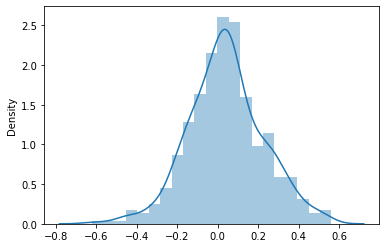

In [110]:
## Plot the Residual on distplot

res = y_train - y_train_pred
sns.distplot(res)

In [111]:
df_test.describe()

,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_No Holiday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_Workining day,weathersit_Light Rain,weathersit_Mist + Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.479452,0.059361,0.086758,...,0.963470,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.639269,0.027397,0.319635
std,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.500722,0.236840,0.282125,...,0.188034,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.481313,0.163612,0.467403
min,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
## Now pop the target variable for y_test

y_test = df_test.pop('cnt')

In [113]:
X_test = df_test

In [114]:
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

In [115]:
y_pred = lr_model.predict(X_test_new)

In [116]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8269457249801845

In [117]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_true=y_train, y_pred=y_train_pred))
print(mean_squared_error(y_true=y_test, y_pred=y_pred))

0.036070654016581626
0.008219352645927531


In [118]:
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_pred))

0.2835010018729297
0.8269457249801845


Text(0, 0.5, 'y_pred')

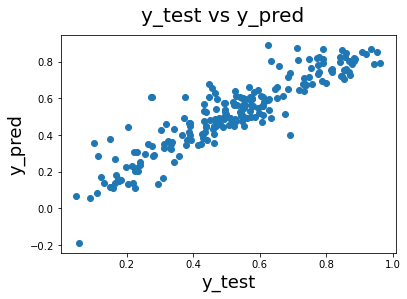

In [119]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=18)                          # Y-label

### We have a R-squared value of 88.5 % on train data and 82.6% on test data.